In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier

from sklearn.svm import SVC
from sklearn import metrics

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier as RF

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, precision_score, recall_score


In [4]:
#  Voting
data = pd.read_excel('D://workspace//CUMCM2022//solver//excel//extract//first//铅钡.xlsx')
# data = pd.read_csv('D://workspace//mathematical_modeling//test_2//solver//excel//extract//1//第一问特征提取.csv',
#                    encoding='utf-8',
#                    index_col='企业代号')
data=data.fillna('0')
data

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),...,五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),总量,表面风化,纹饰,类型,颜色,label
0,02,36.28,0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,...,3.57,0.19,0,0,99.89,风化,A,铅钡,浅蓝,1
1,08,20.14,0,0,1.48,0,1.34,0,10.41,28.68,...,3.59,0.37,0,2.58,99.82,风化,C,铅钡,紫,1
2,08严重风化点,4.61,0,0,3.19,0,1.11,0,3.14,32.45,...,7.56,0.53,0,15.03,98.24,风化,C,铅钡,紫,1
3,11,33.59,0,0.21,3.51,0.71,2.69,0,4.93,25.39,...,9.38,0.37,0,0,95.39,风化,C,铅钡,浅蓝,1
4,19,29.64,0,0,2.93,0.59,3.57,1.33,3.51,42.82,...,8.83,0.19,0,0,98.76,风化,A,铅钡,0,1
5,26,19.79,0,0,1.44,0,0.70,0,10.57,29.53,...,3.13,0.45,0,1.96,99.82,风化,C,铅钡,紫,1
6,26严重风化点,3.72,0,0.4,3.01,0,1.18,0,3.6,29.92,...,6.04,0.62,0,15.95,99.89,风化,C,铅钡,紫,1
7,34,35.78,0,0.25,0.78,0,1.62,0.47,1.51,46.55,...,0.34,0.22,0,0,97.52,风化,C,铅钡,深绿,1
8,36,39.57,2.22,0.14,0.37,0,1.60,0.32,0.68,41.61,...,0.07,0.22,0,0,97.63,风化,C,铅钡,深绿,1
9,38,32.93,1.38,0,0.68,0,2.57,0.29,0.73,49.31,...,0.48,0.41,0,0,98.57,风化,C,铅钡,深绿,1


In [275]:
data.describe()

,二氧化硅(SiO2),氧化铝(Al2O3),氧化铅(PbO),总量,label
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,38.875510,3.667551,33.349184,97.190000,1.265306
std,18.646464,3.008997,14.947312,2.659184,0.446071
min,3.720000,0.450000,9.300000,88.410000,1.000000
25%,24.610000,1.620000,20.120000,96.380000,1.000000
50%,35.780000,3.060000,31.900000,98.240000,1.000000
75%,53.790000,4.700000,44.120000,98.760000,2.000000
max,75.510000,14.340000,70.210000,99.980000,2.000000


In [240]:
# 取7个
data_list = ['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)','氧化铝(Al2O3)','氧化铁(Fe2O3)']
print(len(data_list))


7


In [241]:
x=data.loc[:,data_list]
print(x.shape)
print(x)

(49, 7)
    二氧化硅(SiO2) 氧化钠(Na2O) 氧化钾(K2O) 氧化钙(CaO) 氧化镁(MgO)  氧化铝(Al2O3) 氧化铁(Fe2O3)
0        36.28         0     1.05     2.34     1.18        5.73       1.86
1        20.14         0        0     1.48        0        1.34          0
2         4.61         0        0     3.19        0        1.11          0
3        33.59         0     0.21     3.51     0.71        2.69          0
4        29.64         0        0     2.93     0.59        3.57       1.33
5        19.79         0        0     1.44        0        0.70          0
6         3.72         0      0.4     3.01        0        1.18          0
7        35.78         0     0.25     0.78        0        1.62       0.47
8        39.57      2.22     0.14     0.37        0        1.60       0.32
9        32.93      1.38        0     0.68        0        2.57       0.29
10       26.25         0        0     1.11        0        0.50          0
11       16.71         0        0     1.87        0        0.45       0.19
12       18.46   

In [242]:
y=data.loc[:,'label']
print(y.shape)
print(y)

(49,)
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
Name: label, dtype: int64


In [243]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.1,
                                                    train_size=0.9,
                                                    random_state=20,
                                                    shuffle=True)


tranfer = StandardScaler()
x = tranfer.fit_transform(x)
x_train = tranfer.transform(x_train)
x_test = tranfer.transform(x_test)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(49, 7)
(44, 7)
(5, 7)


In [91]:
# init model

# lightGBM适合较大数据集的样本
# 而对于较小的数据集(<10000条记录)，lightGBM可能不是最佳选择。所以，如果进行调优lightgbm参数，这可能没有帮助。
lgb = LGBMClassifier(learning_rate=0.005,n_estimators=10,objective='binary',
                           boosting_type='gbdt',
                           num_leaves=2**5,
                           max_depth=5,reg_alpha=0.5,reg_lambda=0.5,
                           metric='auc',subsample=0.75)
LR = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Ada = ada(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=30)
GBDT = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.7, loss='exponential', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None,
                           random_state=30, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
svc = SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

rf = RF(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)
#cv：设定交叉验证折数
sclf = StackingCVClassifier(classifiers=[Ada, GBDT, LR,rf],
                            use_probas=True,
                            meta_classifier=svc,
                            random_state=30,
                            cv=5)
metric_xlsx = {}
weight = []
for clf, label in zip(
    [LR, Ada, GBDT, svc, rf, sclf, lgb],
    ['LR', 'Ada', 'GBDT', 'svc', 'rf', 'StackingClassifier', 'LGBMClassifier'
     ]):
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    tem_1 = [
        metrics.accuracy_score(y, clf.predict(x)),
        metrics.accuracy_score(y_train, clf.predict(x_train)),
        metrics.accuracy_score(y_test, y_predict),
        precision_score(y_test, y_predict),
        recall_score(y_test, y_predict),
        metrics.roc_auc_score(y_test,
                              clf.predict_proba(x_test)[:, 1]),
        metrics.f1_score(y_test, y_predict),
    ]

    metric_xlsx[label] = tem_1
    # tem = metrics.accuracy_score(y, clf.predict(x))
    weight.append(tem_1[0])

data2 = pd.DataFrame(data=metric_xlsx,
                     index=[
                        'total_Accuracy',
                         'train_Accuracy', 'test_Accuracy', 'Precision',
                         'Recall', 'AUC', 'f1'
                     ]).T
print(data2)

print(len(weight))
print(weight)

# 软投票
# w = weight/sum(weight)

vote2 = VotingClassifier(estimators=[('LR', LR), ('Ada', Ada), ('GBDT', GBDT),
                                     ('SVC', svc), ('rf', rf),
                                     ('StackingClassifier', sclf),
                                     ('LGBMClassifier',lgb)],
                         voting='soft',
                         weights=weight)
vote2.fit(x_train,y_train)
y_predict = vote2.predict(x_test)

print('{}在测试集集模型的准确率为：\n'.format('soft Voting'),
      metrics.accuracy_score(y_test, y_predict))
print('{}在训练集模型的准确率为：\n'.format('soft Voting'),
      metrics.accuracy_score(y_train, vote2.predict(x_train)))
print('soft voting的综合表现:\n', metrics.accuracy_score(y, vote2.predict(x)))
print()
print('soft voting的ROC面积：\n', roc_auc_score(y, vote2.predict(x)))



                    total_Accuracy  train_Accuracy  test_Accuracy  Precision  \
LR                        0.816327        0.818182            0.8       0.80   
Ada                       0.836735        0.863636            0.6       0.75   
GBDT                      0.979592        1.000000            0.8       0.80   
svc                       0.979592        1.000000            0.8       0.80   
rf                        0.959184        1.000000            0.6       0.75   
StackingClassifier        0.714286        0.704545            0.8       0.80   
LGBMClassifier            0.734694        0.727273            0.8       0.80   

                    Recall    AUC        f1  
LR                    1.00  0.750  0.888889  
Ada                   0.75  0.750  0.750000  
GBDT                  1.00  0.750  0.888889  
svc                   1.00  0.500  0.888889  
rf                    0.75  0.750  0.750000  
StackingClassifier    1.00  0.750  0.888889  
LGBMClassifier        1.00  0.375  0.

In [244]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    train_size=0.8,
                                                    random_state=20,
                                                    shuffle=True)


tranfer = StandardScaler()
x = tranfer.fit_transform(x)
x_train = tranfer.transform(x_train)
x_test = tranfer.transform(x_test)
# print(x.shape)
print(x_train.shape)
print(x_test.shape)

(39, 7)
(10, 7)


In [245]:
# init model
Ada = ada(algorithm='SAMME',
          base_estimator=None,
          learning_rate=0.19,
          n_estimators=140,
          random_state=30)

GBDT = GradientBoostingClassifier(ccp_alpha=0.0,
                                  criterion='friedman_mse',
                                  init=None,
                                  learning_rate=0.7,
                                  loss='exponential',
                                  max_depth=3,
                                  max_features='auto',
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0.0,
                                  min_samples_leaf=10,
                                  min_samples_split=2,
                                  min_weight_fraction_leaf=0.0,
                                  n_estimators=20,
                                  n_iter_no_change=None,
                                  random_state=30,
                                  subsample=1.0,
                                  tol=0.0001,
                                  validation_fraction=0.1,
                                  verbose=0,
                                  warm_start=False)

svc = SVC(C=0.8,
          break_ties=False,
          cache_size=200,
          class_weight=None,
          coef0=0.0,
          decision_function_shape='ovr',
          degree=3,
          gamma=20,
          kernel='rbf',
          max_iter=-1,
          probability=True,
          random_state=None,
          shrinking=True,
          tol=0.001,
          verbose=False)

rf = RF(bootstrap=True,
        ccp_alpha=0.0,
        class_weight=None,
        criterion='gini',
        max_depth=None,
        max_features='auto',
        max_leaf_nodes=None,
        max_samples=None,
        min_impurity_decrease=0.0,
        min_samples_leaf=1,
        min_samples_split=2,
        min_weight_fraction_leaf=0.0,
        n_estimators=25,
        n_jobs=None,
        oob_score=False,
        random_state=30,
        verbose=0,
        warm_start=False)
#cv：设定交叉验证折数
sclf = StackingCVClassifier(classifiers=[lgb,LR],
                            use_probas=True,
                            meta_classifier=svc,
                            random_state=30,
                            cv=5)
metric_xlsx = {}
weight = []


vote2 = VotingClassifier(estimators=[('LR', LR), ('Ada', Ada), 
                                     ('StackingClassifier', sclf),
                                     ('LGBMClassifier',lgb)])


for clf, label in zip([Ada, GBDT, svc, rf],
                      ['Ada', 'GBDT', 'svc', 'rf']):
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    tem_1 = [
        metrics.accuracy_score(y, clf.predict(x)),
        metrics.accuracy_score(y_train, clf.predict(x_train)),
        metrics.accuracy_score(y_test, y_predict),
        precision_score(y_test, y_predict),
        recall_score(y_test, y_predict),
        metrics.roc_auc_score(y_test,
                              clf.predict_proba(x_test)[:, 1]),
        metrics.f1_score(y_test, y_predict),
    ]

    metric_xlsx[label] = tem_1
    # tem = metrics.accuracy_score(y, clf.predict(x))
    weight.append(tem_1[0])

data2 = pd.DataFrame(data=metric_xlsx,
                     index=[
                         'total_Accuracy', 'train_Accuracy', 'test_Accuracy',
                         'Precision', 'Recall', 'AUC', 'f1'
                     ]).T
print(data2)

print(len(weight))
print(weight)

# 软投票
# w = weight/sum(weight)

vote2 = VotingClassifier(estimators=[('Ada', Ada), ('GBDT', GBDT),
                                     ('SVC', svc), ('rf', rf)],
                         voting='soft',
                         weights=weight)
vote2.fit(x_train, y_train)
y_predict = vote2.predict(x_test)

print('{}在测试集集模型的准确率为：\n'.format('soft Voting'),
      metrics.accuracy_score(y_test, y_predict))
print('{}在训练集模型的准确率为：\n'.format('soft Voting'),
      metrics.accuracy_score(y_train, vote2.predict(x_train)))
print('soft voting的综合表现:\n', metrics.accuracy_score(y, vote2.predict(x)))
print()
print('soft voting的ROC面积：\n', roc_auc_score(y, vote2.predict(x)))


      total_Accuracy  train_Accuracy  test_Accuracy  Precision    Recall  \
Ada         0.918367        0.974359            0.7   0.875000  0.777778   
GBDT        0.959184        1.000000            0.8   0.888889  0.888889   
svc         0.979592        1.000000            0.9   0.900000  1.000000   
rf          0.959184        1.000000            0.8   0.888889  0.888889   

           AUC        f1  
Ada   0.777778  0.823529  
GBDT  0.333333  0.888889  
svc   0.666667  0.947368  
rf    0.777778  0.888889  
4
[0.9183673469387755, 0.9591836734693877, 0.9795918367346939, 0.9591836734693877]
y_predict [1 1 1 1 1 1 1 1 2 1]
y_test 4     1
8     1
24    1
27    2
1     1
12    1
23    1
14    1
39    1
48    1
Name: label, dtype: int64
soft Voting在测试集集模型的准确率为：
 0.8
soft Voting在训练集模型的准确率为：
 0.9743589743589743
soft voting的综合表现:
 0.9387755102040817

soft voting的ROC面积：
 0.9091880341880342


In [144]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Ada = ada(algorithm='SAMME',
          base_estimator=None,
          learning_rate=0.17,
          n_estimators=110,
          random_state=30)

parameters = {
    'learning_rate': [0.10+i*0.01 for i in range(10)],'n_estimators':[i for i in range(50,110)]
}
#n_jobs =-1使用全部CPU并行多线程搜索
gs = GridSearchCV(Ada, parameters, refit = True, cv = 5, verbose = 1, n_jobs = -1)
gs.fit(x,y) #Run fit with all sets of parameters.
print('最优参数: ',gs.best_params_)
print('最佳性能: ', gs.best_score_)
print('over')

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
最优参数:  {'learning_rate': 0.19, 'n_estimators': 106}
最佳性能:  0.6266666666666667
over


In [164]:
GBDT = GradientBoostingClassifier(ccp_alpha=0.0,
                                  criterion='friedman_mse',
                                  init=None,
                                  learning_rate=0.7,
                                  loss='exponential',
                                  max_depth=3,
                                  max_features='auto',
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0.0,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  min_weight_fraction_leaf=0.0,
                                  n_estimators=20,
                                  n_iter_no_change=None,
                                  random_state=30,
                                  subsample=1.0,
                                  tol=0.0001,
                                  validation_fraction=0.1,
                                  verbose=0,
                                  warm_start=False)


parameters = {
    'learning_rate': [0.5 + i * 0.05 for i in range(10)],
    'n_estimators': [i for i in range(10, 50, 5)],
    'max_depth': [i for i in range(3, 14, 4)],
    'min_samples_split': [i for i in range(2, 50, 4)],
    'min_samples_leaf':[i for i in range(1, 30, 4)]

}
#n_jobs =-1使用全部CPU并行多线程搜索
gs = GridSearchCV(GBDT, parameters, refit = True, cv = 5, verbose = 1, n_jobs = -1)
gs.fit(x,y) #Run fit with all sets of parameters.
print('最优参数: ',gs.best_params_)
print('最佳性能: ', gs.best_score_)
print('over')

Fitting 5 folds for each of 23040 candidates, totalling 115200 fits
最优参数:  {'learning_rate': 0.5, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 42, 'n_estimators': 10}
最佳性能:  0.7355555555555556
over


In [ ]:


svc = SVC(C=0.8,
          break_ties=False,
          cache_size=200,
          class_weight=None,
          coef0=0.0,
          decision_function_shape='ovr',
          degree=3,
          gamma=20,
          kernel='rbf',
          max_iter=-1,
          probability=True,
          random_state=None,
          shrinking=True,
          tol=0.001,
          verbose=False)


parameters = {
    'learning_rate': [0.10 + i * 0.01 for i in range(10)],
    'n_estimators': [i for i in range(50, 110)]
}
#n_jobs =-1使用全部CPU并行多线程搜索
gs = GridSearchCV(Ada, parameters, refit=True, cv=5, verbose=1, n_jobs=-1)
gs.fit(x, y)  #Run fit with all sets of parameters.
print('最优参数: ', gs.best_params_)
print('最佳性能: ', gs.best_score_)
print('over')

In [ ]:

rf = RF(bootstrap=True,
        ccp_alpha=0.0,
        class_weight=None,
        criterion='gini',
        max_depth=None,
        max_features='auto',
        max_leaf_nodes=None,
        max_samples=None,
        min_impurity_decrease=0.0,
        min_samples_leaf=1,
        min_samples_split=2,
        min_weight_fraction_leaf=0.0,
        n_estimators=25,
        n_jobs=None,
        oob_score=False,
        random_state=30,
        verbose=0,
        warm_start=False)

parameters = {
    'learning_rate': [0.10+i*0.01 for i in range(10)],'n_estimators':[i for i in range(50,110)]
}
#n_jobs =-1使用全部CPU并行多线程搜索
gs = GridSearchCV(Ada, parameters, refit = True, cv = 5, verbose = 1, n_jobs = -1)
gs.fit(x,y) #Run fit with all sets of parameters.
print('最优参数: ',gs.best_params_)
print('最佳性能: ', gs.best_score_)
print('over')

In [ ]:
P = vote2.predict_proba(x)[:, 1]
fpr,tpr,threshold = metrics.roc_curve(y,P)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

#绘制面积图
plt.figure(figsize=(6,4),dpi=250)
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')
# 添加边际线
plt.plot(fpr,tpr,color='black',lw=1)
# 添加对角线
plt.plot([0,1],[0,1],color='red',linestyle='--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.4f)' % roc_auc,fontsize=10)
# 添加x轴坐标与y轴坐标
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

fpr,tpr,threshold = metrics.roc_curve(y,P)
# 计算AUC的值
print('AUC的值为：',roc_auc)
# plt.savefig('./latex/img/1/AUC.png')
plt.show()

In [210]:
type(x)
x.shape

(49, 7)

In [303]:
step = 100
list_1 = [33.61472222,3.117272727,0.32125,2.483529412,1.096956522,3.838333333,0.952857143,2.113529412,36.87194444,11.44060606,4.986333333,0.4121875,0.67,8.88]
list_2 = [53.44384615,3.343333333,0.42,1.455454545,0.914285714,3.194615385,2.021666667,1.84,23.59384615,10.49923077,1.068181818,0.4825,0.42,3.66]

diff_list = [(list_1[i]-list_2[i])/step for i in range(x_train.shape[1])]
print('list_1',list_1)
print('list_2', list_2)
print('diff_list', diff_list)


point_list=[]
for i in range(step):
    point = [list_1[j]+diff_list[j]*i for j in range(len(diff_list))]
    point_list.append(point)

point_numpy = np.array(point_list)
print(point_numpy.shape)
print(point_numpy)

list_1 [33.61472222, 3.117272727, 0.32125, 2.483529412, 1.096956522, 3.838333333, 0.952857143, 2.113529412, 36.87194444, 11.44060606, 4.986333333, 0.4121875, 0.67, 8.88]
list_2 [53.44384615, 3.343333333, 0.42, 1.455454545, 0.914285714, 3.194615385, 2.021666667, 1.84, 23.59384615, 10.49923077, 1.068181818, 0.4825, 0.42, 3.66]
diff_list [-0.1982912393, -0.002260606059999999, -0.0009875, 0.010280748670000001, 0.001826708079999999, 0.006437179479999999, -0.010688095239999997]
(100, 7)
[[ 3.36147222e+01  3.11727273e+00  3.21250000e-01  2.48352941e+00
   1.09695652e+00  3.83833333e+00  9.52857143e-01]
 [ 3.34164310e+01  3.11501212e+00  3.20262500e-01  2.49381016e+00
   1.09878323e+00  3.84477051e+00  9.42169048e-01]
 [ 3.32181397e+01  3.11275151e+00  3.19275000e-01  2.50409091e+00
   1.10060994e+00  3.85120769e+00  9.31480953e-01]
 [ 3.30198485e+01  3.11049091e+00  3.18287500e-01  2.51437166e+00
   1.10243665e+00  3.85764487e+00  9.20792857e-01]
 [ 3.28215573e+01  3.10823030e+00  3.17300000e

In [302]:
y_pred = vote2.predict(point_numpy)
print(y_pred)
print(y_pred.shape)
print(sum(y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(100,)
100


In [296]:

mean_2= []
for component in data_list:
    print(np.mean((data[data['label'] == 2].loc[:, component]).values))

mean_2


53.44384615384615


TypeError: can only concatenate str (not "float") to str

In [258]:
point_predict= vote2.predict(x_train)
print(sum(point_predict))
print(point_predict)

50
[1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 1 1 2 2 1
 2 2]


[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


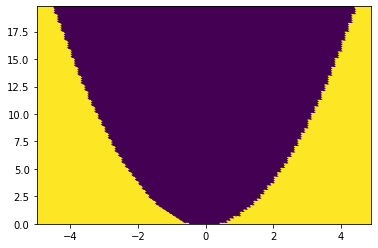

In [173]:
import numpy as np
import matplotlib.pyplot as plt


min_list = [i]
x = np.arange(-5,5,0.1)
y = np.arange(0,20,0.2)
xx,yy = np.meshgrid(x,y)

z = np.square(xx) - yy >0
print(z)
plt.contourf(xx,yy,z,cmap="cool")
plt.scatter(xx,yy,c = z)
plt.show()

x = np.arange(-5, 5, 0.1)
y = np.arange(0, 20, 0.2)
xx, yy = np.meshgrid(x, y)

z = np.square(xx) - yy > 0
print(z)
plt.contourf(xx, yy, z, cmap="cool")
plt.scatter(xx, yy, c=z)
plt.show()